---
toc: true
comments: true
layout: post
title: U9 Inheritance P1 Student
description: Lesson on Java class hierarchy.
type: hacks
courses: { csa: {week: 11} }
authors: David, Alex, Drew, Derrick, Jishnu
---

## 9.1 Superclasses and Subclasses
> A hierarchy of classes is created, extending attributes into subclasses of information (ie. Automobile --> Trucks and Sedans --> Ford, BMW, Nissan, Toyota). 

### Pre-Requisites

Before we start you need to remember what classes and methods are. Scopes of variables are also important to this section because you need to know which classes can access which variables before extending a variable across classes.

#### Scope of Variables:

Variables can be declared as private or public.

> **Popcorn Hack:** What are scope do private and public variables allow?

| Private | Public |
|-|-|
| only directly accessible within the class they are declared | accessible anywhere inside and outside their class |

These are different types of variables. Only `INSTANCE` and `STATIC` variables can be declared as ____ or ____.

| Variable Type | Definition | Scope within Class | Scope to Subclasses |
|-|-|-|-|
|  | variables within methods | cannot be accessed outside method | cannot be accessed outside class |
|  | variables within a class but not inside a method | can be accessed in entire class | can be accessed in subclasses |
|  | variables that belong to a class, not instance | can be accessed in entire class | can be accessed in subclasses |
|  | variables specific in passing values to the method | cannot be accessed outside method | do not affect inheritance |

Now we can go into class hierarchies.

### Class Hierarchy

**Definitions**
- Superclasses - a class that contains all the common attributes and behaviors that could be shared among other classes (a blueprint for subclasses)
- Subclasses - extends the behaviors to is specified by a superclass; can also have additional specific attributes
- "Is-A" Relationship - the relationship when a subclass extends a superclass (ie. Automobile --> Sedan; a Sedan "is-a" automobile)

#### `extends` Keyword
> extends the subclass from the superclass

In [2]:
class Automobile {
  public String brand; // public instance var
  private String model; // private instance var

  public Automobile(String brand, String model) {
    this.brand = brand;
    this.model = model;
  }

  public void start() {
    System.out.println("Car is starting");
  }
}

class Truck extends Automobile {
  public int cargoCapacity; // subclass specific var

  // instance that is specific to the Truck subclass, with vars from Automobile class
  public Truck(String brand, String model, int cargoCapacity) {
    super(brand, model); // inherited vars
    this.cargoCapacity = cargoCapacity;
  }

  // specific method to Truck
  public void loadCargo() {
    System.out.println("Loading cargo into the truck");
  }
}

class Sedan extends Automobile {
  public boolean isLuxury; // subclass specific var

  // instance that is specific to the Sedan subclass, with vars from Automobile class
  public Sedan(String brand, String model, boolean isLuxury) {
    super(brand, model); // inherited vars
    this.isLuxury = isLuxury;
  }

  // specific method to Sedan
  public void accelerate() {
    System.out.println("Sedan is accelerating");
  }
}

public class Main {
    public static void main(String[] args) {
        Automobile car = new Automobile("Toyota", "Camry");
        Truck truck = new Truck("Ford", "F-150", 1000);
        Sedan sedan = new Sedan("BMW", "328i", true);

        // automobile methods and variables
        System.out.println(car.brand); // Accessing public variable
        // System.out.println(car.model); // compilation error because of the private var
        car.start();


        // truck methods and variables
        System.out.println(truck.brand); // inherited public var
        System.out.println(truck.cargoCapacity); // public var specific to truck
        truck.loadCargo();


        // sedan methods and variables
        System.out.println(sedan.brand); // inherited public var
        System.out.println(sedan.isLuxury); // public var specific to sedan
        sedan.accelerate();
    }
}

Main.main(null);

Toyota
Car is starting
Ford
1000
Loading cargo into the truck
BMW
true
Sedan is accelerating


This example shows how the `Automobile` class is extended twice, with the `Truck` and `Sedan` subclasses.

> **Popcorn Hack:** If I were to declare a variable `color` that is `private` in the class Automobile, would I be able to extend and directly access that variable to the subclass `Truck` or `Sedan`?

A: No, you would need to encapsulate the private variable as shown above, through a method in the superclass and then inherit that var with `super()`, which will be explained later.

## 9.2 Writing Constructors for Subclasses

### Learning Objectives

- Constructors are not inherited
- When a subclass's constructor doesn't explicitly call a superclass's constructor using `super`, Java inserts a call to the superclass's no-argument constructor.
- The actual parameters passed in the call to the superclass constructor provide values that the constructor can use to initialize the object's instance variables.
- Regardless of whether the superclass constructor is called implicitly or explicitly, the process of calling superclass constructors continues until the Object constructor is called. At this point, all of the constructors within the hierarchy execute beginning with the Object constructor.

**Important note:** Constructors are NOT inherited by the subclass. See this in action below.

In [3]:
// TO BE INCLUDED EARLIER IN THE LESSON. IT IS NECESSARY FOR THE FUNCTIONALITY OF THIS SECTION.

class Vehicle {
    public int year;
    public String manufacturer;

    public Vehicle(int year, String manufacturer) { // constructor for parent class
        this.year = year;
        this.manufacturer = manufacturer;
    }

    public Vehicle() {
        this.year = 2000;
        this.manufacturer = "Unknown";
    }

    // method to be used later
    public void drive() {
        System.out.println("The driver is driving the car.");
    }
}

In [4]:
class Car extends Vehicle {
    public String model;

    public Car(String model) {
        this.model = model;
    }
}

public class VehicleDemonstration {
    public static void main(String[] args) {
        Car myCar = new Car("Altima");
        System.out.println("Year: " + myCar.year);
        System.out.println("Manufacturer: " + myCar.manufacturer);
        System.out.println("Model: " + myCar.model);
    }
}

VehicleDemonstration.main(null);

Year: 2000
Manufacturer: Unknown
Model: Altima


As you can see, the output uses the no-argument construction info from the base `Vehicle` constructor.

The `super` keyword can be used to change parent constructor values.

In [4]:
class NewCar extends Vehicle {
    public String model;

    public NewCar(int year, String manufacturer, String model) {
        super(year, manufacturer); // see the use of super here
        // what happens if you use no arguments with super()? see reminders below
        this.model = model;
    }
}

public class VehicleDemonstration2 {
    public static void main(String[] args) {
        NewCar myCar = new NewCar(2016, "Nissan", "Altima");
        System.out.println("Year: " + myCar.year);
        System.out.println("Manufacturer: " + myCar.manufacturer);
        System.out.println("Model: " + myCar.model);
    }
}

VehicleDemonstration2.main(null);

Year: 2016
Manufacturer: Nissan
Model: Altima


#### Key Reminders:

1. If you do call `super()` in your constructor, it <mark>has to be the first line of the constructor</mark>.
2. You <mark>cannot</mark> assign values to parent attributes/variables without using `super()`.
3. If you call `super()` with no arguments, <mark>it will use the no-argument parent constructor</mark>. This also happens automatically if you don't include any `super()` call.

## 9.3 Overriding Methods

### Learning Objectives

- Method overriding occurs when a public method in a subclass has the same method signature as a public method in the superclass.
- Any method that is called must be defined within its own class or its superclass.
- A subclass is usually designed to have modified (overwritten) or additional methods or instance variables.
- A subclass will inherit all public methods from the superclass; these methods remain public in the subclass.

There are three options for methods to be used by subclasses:

1. Methods inherited from the parent class
2. Unique methods written for the subclass
3. Override parent methods to modify its implementation

The first two should make sense. Let's see an example of overriding parent methods below.

In [5]:
public class NuroCar extends Vehicle {
    private String deliveryItem;

    // unique constructor
    public NuroCar(int year, String manufacturer, String deliveryItem) {
        super(year, manufacturer); // another use of super
        this.deliveryItem = deliveryItem;
    }

    // HERE is the overridden function
    public void drive() {
        System.out.println("This car is driving itself!");
    }
}

public class VehicleDemonstration3 {
    public static void main(String[] args) {
        NuroCar pizzaCar = new NuroCar(2023, "Nuro", "Pizza");
        // here's the call to the overridden function
        pizzaCar.drive();
    }
}

VehicleDemonstration3.main(null);

This car is driving itself!


This can be very helpful if you want a certain parent method to function slightly differently for a certain subclass.

#### Popcorn Hack

A parent class `Animal` is often used to show how subclasses can differ from their parent classes. An `Animal` parent class is provided in the cell below. Create a subclass of a certain species that <mark>overrides a parent method</mark> and <mark>uses `super` to call to the parent's constructor while adding its own unique attributes</mark>.

Hint: <button id="but1" onclick="hint(1)">See Hint</button>
<div id="hint1" style="display:none;">Not all animals "run" like the `move()` function says...</div>
<script>
    function hint(number) {
        document.getElementById("but" + String(number)).style.display = "none";
        document.getElementById("hint" + String(number)).style.display = "block";
    }
</script>

In [1]:
// parent class
public class Animal {
    private String species;
    private int milesPerHour;

    // no argument constructor
    public Animal() {
        this.species = "Unknown";
        this.milesPerHour = 10;
    }

    // constructor with arguments
    public Animal(String species, int milesPerHour) {
        this.species = species;
        this.milesPerHour = milesPerHour;
    }

    // parent method
    public void move() {
        System.out.println("The " + this.species.toLowerCase() + " runs at " + this.milesPerHour + " miles per hour.");
    }
}

// your subclass goes here

public class Dog extends Animal {
    private String breed;

    // no argument constructor
    public Dog() {
        super();
        this.breed = "Unknown";
    }

    // constructor with arguments
    public Dog(String species, int milesPerHour, String breed) {
        super(species, milesPerHour);
        this.breed = breed;
    }

    // overriding parent method
    @Override
    public void move() {
        System.out.println("The " + this.breed.toLowerCase() + " breed " + super.getSpecies().toLowerCase() + " runs at " + super.getMilesPerHour() + " miles per hour.");
    }
}

## 9.4 Super Keyword

### Using the super keyword to call a superclass's method.

In [6]:
public class Performer { //superclass
    public void practice(){
        System.out.println("Honing my craft!");
    }
    public void perform(){
        System.out.println("Performing for an audience!");
    }
}

public class Dancer extends Performer { //subclass
    public void perform(){
        System.out.println("Dancing on the stage!");
    }
}

public class BalletDancer extends Dancer { //subclass
    public void jete(){
        System.out.println("Leaping...");
    }
    public void pirouette(){
        System.out.println("Spinning...");
    }
    public void perform(){
        jete();
        pirouette();
    }
        public static void main(String[] args){
            BalletDancer derrick = new BalletDancer();
            derrick.practice();
            derrick.perform();
        }
}

System.out.println("BalletDancer class: ");
BalletDancer.main(null);

BalletDancer class: 
Honing my craft!
Leaping...
Spinning...


In [ ]:
public class Performer { //superclass of Dancer class
    public void practice(){
        System.out.println("Honing my craft!");
    }
    public void perform(){
        System.out.println("Performing for an audience!");
    }
}

public class Dancer extends Performer { //superclass of BalletDancer class
    public void perform(){
        System.out.println("Dancing on the stage!");
    }
}

public class BalletDancer extends Dancer {
    public void jete(){
        System.out.println("Leaping...");
    }
    public void pirouette(){
        System.out.println("Spinning...");
    }
    public void perform(){ 
        perform();//Why is this wrong?
        jete();
        pirouette();
    }
        public static void main(String[] args){
            BalletDancer derrick = new BalletDancer();
            derrick.practice();
            derrick.perform();
        }
}

System.out.println("BalletDancer class: ");
BalletDancer.main(null);

### Note:
Super keyword can be placed in any order as it prints out chronologically. 

In [ ]:
public void perform(){ 
    super.perform();
    jete();
    pirouette();
}

In [ ]:
"Honing my craft!
Dancing on the stage!
Leaping...
Spinning..."

#### However, if we were to write:

In [ ]:
public void perform(){ 
    jete();
    pirouette();
    super.perform();
}

In [ ]:
"Honing my craft!
Leaping...
Spinning...
Dancing on the stage!"

### What if we use 2 super keywords?

In [8]:
public class Performer { //superclass
    public void practice(){
        System.out.println("Honing my craft!");
    }
    public void perform(){
        System.out.println("Performing for an audience!");
    }
}

public class Dancer extends Performer { //subclass
    public void perform(){
        super.perform();
        System.out.println("Dancing on the stage!");
    }
}

public class BalletDancer extends Dancer { //subclass
    public void jete(){
        System.out.println("Leaping...");
    }
    public void pirouette(){
        System.out.println("Spinning...");
    }
    public void perform(){
        super.perform();
        jete();
        pirouette();
    }
        public static void main(String[] args){
            BalletDancer derrick = new BalletDancer();
            derrick.practice();
            derrick.perform();
        }
}

System.out.println("BalletDancer class: ");
BalletDancer.main(null);

BalletDancer class: 
Honing my craft!
Performing for an audience!
Dancing on the stage!
Leaping...
Spinning...


### Popcorn Hack
Create a subclass and a superclass by calling the methods from the superclass from the subclass using the keyword super.


In [4]:
public class Performer {
    public void practice(){
        System.out.println("Practicing");
    }
    public void perform(){
        System.out.println("Performing");
    }
}

public class Dancer extends Performer {
    public void perform(){
        super.perform();
        System.out.println("Dancing");
    }
}

public class BalletDancer extends Dancer {
    public void jete(){
        System.out.println("Leaping");
    }
    public void pirouette(){
        System.out.println("Spinning");
    }
    public void perform(){
        super.perform();
        jete();
        pirouette();
    }
    public static void main(String[] args){
        BalletDancer fred = new BalletDancer();
        fred.practice();
        fred.perform();
    }
}

BalletDancer.main(null);

Practicing
Performing
Dancing
Leaping
Spinning


# 9.5 Creating References Using Inheritance Hierarchies

Inheritance Hierarchies is the idea that:

- If we have a public superclass (A) that then has a public subclass (B) and that public subclass then has another public subclass (C), then the subclass C is also a subclass of the superclass A and so subclass C is extending superclass A

Here is an example of this:

In [ ]:
// Class Declarations:

// Superclass (A)
public class Vehicles{}
// Subclass (B)
public class Car extends Vehicles{}
// Subclass (C)
public class Sedan extends Car{}
// Subclass (D)
public class Truck extends Vehicles{}

Here is a diagram displaying this relationship:

![Inheritance Hierarchy Example](https://raw.githubusercontent.com/JishnuS420/BlogCSA/main/images/inheritance-hierarchy-example.png)

- This diagram shows the the vehicle superclass which then has two subclasses: Car and Truck, however, Car has another subclass called Sedan

- Based on this diagram, we know that Truck has a "is-a" relationship with Vehicle, Car also has a "is-a" relationship with Vehicle, and since Car has an "is-a" relationship with Vehicle, so does Sedan

- So Sedan also has a "is-a" relationship with Vehicle

If we assume that all of the class contain a constructor with no arguments, this then allows for us to declare a superclass reference variable to hold a subclass object:

In [ ]:
Vehicles v1 = new Truck();
Vehicles v2 = new Car();

// instead of doing
Car v3 = new Sedan();
// We have the option to do this instead
Vehicles v4 = new Sedan();

However, it is important to remember that you can't declare a Subclass variable and put in a Superclass object

In [ ]:
// don't do this
Sedan v5 = new Vehicle();

>Popcorn Hack: Using a superclass and subclasses of your choice, assuming that the classes contain a constructor with no arguments, create Class Declarations and Superclass References

In [ ]:
// show here

## Why would we want to do this?

- When doing object oriented programming, we are able to create a superclass with common attributes and then have subclasses with more specific traits 

- By doing this, we get rid of code redundancy and it also makes the easier to reuse common aspects without needing to write them out every time while still presenting the option to override any attribute from the superclass to better represent the subclass

- All the subclasses adhere to one superclass so this makes updates to code much easier and allows you to take advantage of **polymorphism** to unify the code and allow for more flexible and manageable code (more about this in 9.6)

## Here is a Complete Example of the Inheritance Hierarchy from above:

In [1]:
class Vehicle {
    private String brand; // private instance variable
    private int year; // private instance variable

    public Vehicle(String brand, int year) {
        this.brand = brand;
        this.year = year;
    }

    public void displayInfo() { // common variables for each vehicle
        System.out.println("Brand: " + brand);
        System.out.println("Year: " + year);
    }
}

class Truck extends Vehicle {
    // feature that only a truck can have
    private double maxLoadCapacity;

    public Truck(String brand, int year, double maxLoadCapacity) {
        super(brand, year); // Inherits the variables from superclass
        this.maxLoadCapacity = maxLoadCapacity;
    }

    @Override // Override allows for displayInfo to now also show the trait specific to the Truck while still keeping the main variables
    public void displayInfo() {
        super.displayInfo(); // Reuse the displayInfo method from the superclass
        System.out.println("Max Load Capacity: " + maxLoadCapacity + " tons");
    }
}

class Car extends Vehicle {
    // something that cars have
    private int numberOfDoors;

    public Car(String brand, int year, int numberOfDoors) {
        super(brand, year);
        this.numberOfDoors = numberOfDoors;
    }

    @Override // Override allows for displayInfo to now also show the trait specific to the Car while still keeping the main variables
    public void displayInfo() {
        super.displayInfo(); // Reuse the displayInfo method from the superclass
        System.out.println("Number of Doors: " + numberOfDoors);
    }
}

class Sedan extends Car {
    // Sedan is luxury so trait specific to sedan
    private boolean leatherSeats;

    public Sedan(String brand, int year, int numberOfDoors, boolean leatherSeats) {
        super(brand, year, numberOfDoors);
        this.leatherSeats = leatherSeats;
    }

    @Override // Override allows for displayInfo to now also show the trait specific to the Sedan while still keeping the main variables
    public void displayInfo() {
        super.displayInfo(); // Reuse the displayInfo method from the superclass
        System.out.println("Leather Seats: " + leatherSeats);
    }
}

public class Main {
    public static void main(String[] args) {
        Vehicle v1 = new Truck("Ford", 2023, 10.5);
        Vehicle v2 = new Car("Toyota", 2023, 4);
        Vehicle v3 = new Sedan("Honda", 2023, 4, true);

        System.out.println("Truck Information:");
        v1.displayInfo();
        
        System.out.println("\nCar Information:");
        v2.displayInfo();
        
        System.out.println("\nSedan Information:");
        v3.displayInfo();
    }
}
Main.main(null)

Truck Information:
Brand: Ford
Year: 2023
Max Load Capacity: 10.5 tons

Car Information:
Brand: Toyota
Year: 2023
Number of Doors: 4

Sedan Information:
Brand: Honda
Year: 2023
Number of Doors: 4
Leather Seats: true


>Popcorn Hack: In your own words describe the importance of Inheritance Hierarchies

It is important because it allows your classes to be much more concise and efficient by using common code.

# 9.6 Polymorphism

## Learning Objectives
<mark>MOD-3.D</mark>: Call methods in an inheritance relationship.  
<mark>MOD-3.D.1</mark>: Utilize the Object class through inheritance.  
<mark>MOD-3.D.2</mark>: At compile time, methods in or inherited by the declared type determine the correctness of a non-static method call.  
<mark>MOD-3.D.3</mark>: At run-time, the method in the actual object type is executed for a non-static method call.  

## What is Polymorphism?
**Polymorphism** is a greek word meaning many-formed (poly=many, morph=form). In the context of programming, Polymorphic behavior is defined as being able to reference objects of different types at different points during compilation.  

One example of Java polymorphism, is our ability to store references to objects instantiated from any class AND its *subclasses* in a variable. Another example is for methods, where we override the behavior of a method in a subclass such that it differs from the parent class. We successfully perform polymorphism when we override non-static methods and execute them from the correct, corresponding class at runtime.  

Here is a simple example of polymorphism:

In [ ]:
// This is our Parent class
class Shape {
    public void draw() {
        System.out.println("Drawing a shape");
    }
}

// Subclass 1
class Circle extends Shape {
    @Override
    public void draw() {
        System.out.println("Drawing a circle");
    }
}

// Subclass 2
class Rectangle extends Shape {
    @Override
    public void draw() {
        System.out.println("Drawing a rectangle");
    }
}

public class Main {
    public static void main(String[] args) {
        
        // Here we have reference variables circle and rectangle defined with static type "Shape"
        Shape circle = new Circle();            // Circle has dynamic type "Circle"
        Shape rectangle = new Rectangle();      // Rectangle has dynamic type "Rectangle"
        
        // Calling the draw() method
        circle.draw();    // Output: Drawing a circle
        rectangle.draw(); // Output: Drawing a rectangle
    }
}

Main.main(null);

Even though the circle and rectangle have identical data-types, the compiler knows to call the correct method at run-time. We have successfully performed polymorphism

### Popcorn hack
1. Create any example of polymorphism, preferably with a class from your project, with corresponding methods and attributes as well.

In [5]:
class Calculator {
    // Method overloading for addition
    double calculate(double a, double b) {
        return a + b;
    }

    // Method overloading for multiplication
    double calculate(double a, double b, double c) {
        return a * b * c;
    }
}

public class Main {
    public static void main(String[] args) {
        Calculator calculator = new Calculator();

        // Addition
        double sum = calculator.calculate(5.5, 4.5);
        System.out.println("Sum: " + sum);

        // Multiplication
        double product = calculator.calculate(5.5, 4.5, 3.5);
        System.out.println("Product: " + product);
    }
}

Main.main(null);

Sum: 10.0
Product: 86.625


## Static and Dynamic types
Typically in Java, a reference variable storing an object instantiated from a child class can only store other objects of that class. If we try to store an object of another class, we'd get an error i.e.  

```java
Integer myNumber = new Integer(6);      // Instantiates an Integer object
System.out.println(myNumber);           // Would print Integer type 6 normally
myNumber = new Double(6.1);             // Compile error occurs, incompatible types
System.out.println(myNumber);           // This line is not reached
```  

But what if we want want a reference variable to store objects of other classes? We get an error

## Compile-time vs Runtime methods
Sometimes, when we perform polymorphism, we have to be careful to distinguish between our **compile time** and **run-time** methods. When we instantiate a dynamic variable that is of *a different type* from our static variable, our program at run time will attempt to search for the methods and attributes in the superclass, NOT the child class that we created. Although the compiled program will still output the correct outputs of the method in the child class, it will not be able to find a method that exists in the child class but not in the parent class.  

To resolve this issue, we need use **Down-casting**.
 - **Downcasting**: Essentially telling the compiler to refer to a variable's subclass (the programmer specifies this), instead of the static type. We are telling the compiler to search our dynamic type for the methods and attributes that we want to access.

Below is an example of compile versus run-time methods and downcasting that I used in our group's project.

In [ ]:
import java.util.HashMap;
// This is our parent class for all child classes that make up a graph
public class GraphObject {
    private int value;

    // constructor
    public GraphObject(int value) {
        this.value = value;
    }

    // getter method
    public int getValue() {
        return this.value;
    }

    // setter method
    public void setValue(int value) {
        this.value = value;
    }

    // Method overloading to print object to terminal
    @Override
    public String toString() {
        return Integer.toString(this.value);
    }
}

// This is our child class. Represents a vertex or a node in a graph
public class GraphNode extends GraphObject {
    private HashMap<Integer,Integer> edges;     // Hashmap of destination vertices and weights of paths <Target:Weight>

    // Constructor of child class
    public GraphNode(int value, HashMap<Integer,Integer> edges){
        super(value);                           // super keyword to run constructor of parent class, which sets the value of the node
        this.edges = edges;                     // adds any needed edges
    }

    public HashMap<Integer,Integer> getEdges() {
        return this.edges;
    }

    public void addEdge(int targetId, int weight) {
        this.edges.put(targetId, weight);
    }

    public void removeEdge(int targetId) {
        this.edges.remove(targetId);
    }
    
    // Overloading the toString method of the parent class, using super to get the output of the parent class
    @Override
    public String toString() {
        return "GraphNode[value=" + super.toString() + ",edges=" + this.edges + "]";
    }
} 
HashMap<Integer, Integer> node1Connections = new HashMap<Integer, Integer>();
node1Connections.put(2, 7);
node1Connections.put(3, 2);
node1Connections.put(4, 10);
GraphObject node1 = new GraphNode(1, node1Connections);
System.out.println(node1.toString());
((GraphNode)node1).addEdge(5,6);        // Here, we downcast node1, which is a GraphObject, to what it references, which is GraphNode
// node1.addEdge(5,6);                  // This wouldn't work as the compiler attempts to find addEdge() in GraphObject, which it can't, throwing an error  
System.out.println(node1.toString());

# Popcorn Hacks
1. Define each of the following terms in your own words
Downcasting: This is when you tell your program to treat a general object as a specific one.
Static Type: The type of a variable is known before the program runs.
Dynamic Type: The type of a variable is figured out while the program is running.
Polymorphism: Different objects can perform the same action in their own way.
Compile-time method: The program knows which method will be called before it starts running.
Run-time method: The program decides which method to call while it’s running.

# 9.7 Object Superclass

- The Object class is the superclass of all other classes as well as data types and is a part of the java.lang package

-  If a parent class doesn't specify by using the `extends` keyword, the class will inherit from the Object 

- `String toString()` and `boolean equals(object other)` are the most frequently used and subclasses of Object override the equals and toString methods by using class-specific implementations

Normally when you use the `toString` method without overriding it, it returns a hash code value as seen in the example below:

In [2]:
class Person {
    private String name;
    private int age;

    public Person(String name, int age) {
        this.name = name;
        this.age = age;
    }
}

public class ToStringNoOverride {
    public static void main(String[] args) {
        Person person = new Person("Alice", 25);
        // When you print this out, it will return the hash code since its using the default method for toString
        System.out.println(person);
    }
}
ToStringNoOverride.main(null)

REPL.$JShell$18$Person@4da14117


However, we can fix this by creating a new method by **overriding** the normal `toString` method and building our own representation of the object

In [3]:
class Person {
    private String name;
    private int age;

    public Person(String name, int age) {
        this.name = name;
        this.age = age;
    }

    @Override
    public String toString() { // We override the toString method here
        return "Person Name: " + name + "\nPerson Age: " + age; // We then add our own custom string representation
    }
}

public class ToStringOverride {
    public static void main(String[] args) {
        Person person = new Person("Alice", 25);

        // When you print the person object, it calls the overridden toString method we made
        System.out.println(person);
    }
}
ToStringOverride.main(null)

Person Name: Alice
Person Age: 25


Now, we want to compare 2 people by using `boolean equals(Object other)` and determine if they are the same

In [4]:
class Person {
    private String name;
    private int age;

    public Person(String name, int age) {
        this.name = name;
        this.age = age;
    }

    @Override
    public String toString() {
        return "Person Name: " + name + "\nPerson Age: " + age;
    }
}

public class EqualsNoOverride {
    public static void main(String[] args) {
        Person person1 = new Person("Alice", 25);
        Person person2 = new Person("Bryce", 25);

        System.out.println("Person 1 Age equals Person 2 Age: " + person1.equals(person2)); // use the equals method to compare the two people
    }
}
EqualsNoOverride.main(null)

Person 1 equals Person 2: false


False is returned when you use the `boolean equals(Object other)` because the parameters is of Type Object superclass is unable to detect them since the Object class saves them under two different memory addresses and to fix this, we have to make an override method for this.

To do this, we use `instanceof` and casting

In [5]:
class Person {
    private String name;
    private int age;

    public Person(String name, int age) {
        this.name = name;
        this.age = age;
    }

    @Override // We override the equals method
    public boolean equals(Object other) {
        if (!(other instanceof Person)) // Using instanceof, we are making sure that the we compare objects of the same class
            return false;
        Person that = (Person) other; // Here we perform casting to make sure that other is converted to Person
        return this.age == that.age;
    }

    @Override
    public String toString() {
        return "Person Name: " + name + "\nPerson Age: " + age;
    }
}

public class EqualsOverride {
    public static void main(String[] args) {
        Person person1 = new Person("Alice", 25);
        Person person2 = new Person("Bryce", 25);

        System.out.println("Person 1 Age equals Person 2 Age: " + person1.equals(person2));
    }
}
EqualsOverride.main(null)

Person 1 Age equals Person 2 Age: true


## Hacks

Create a superclass with at least 2 subclasses based on your own topic.

- Create a DrawIO diagram for your structure and label them with superclasses and subclasses
- Create a superclass on your own topic
- Create at least two subclasses
- Each class must create at least two methods, one private and public variable, and examples of local, static, instance, and parameter variables
- Override at least one method
- Use the `super` keyword at least once

![Screenshot 2023-11-05 at 10.35.44 AM.png](<attachment:Screenshot 2023-11-05 at 10.35.44 AM.png>)
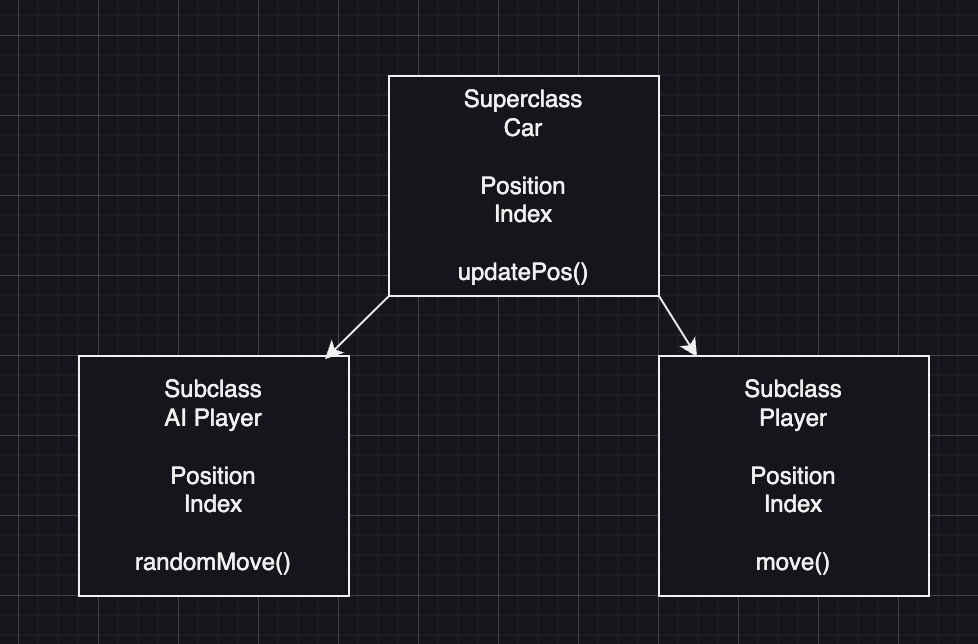

In [39]:
import java.util.Random;

public abstract class Car {
    public int position; // public variable
    private int index; // private variable

    public Car(int position, int index) {
        this.position = position;
        this.index = index;
    }

    public void updatePos() {
        System.out.println("Car " + this.index + " position: " + this.position);
    }

    public abstract void move();
}

public class Player extends Car {
    public Player(int position, int index) {
        super(position, index);
    }

    @Override
    public void move() {
        this.position += 1;
        this.updatePos();
    }
}

public class AIPlayer extends Car {
    private Random random = new Random();

    public AIPlayer(int position, int index) {
        super(position, index);
    }

    @Override
    public void move() {
        this.position += random.nextInt(3); // move forward a random number from 0-2
        this.updatePos();
    }
}

public class Main {
    public static void main(String[] args) {
        Player player = new Player(0, 0);
        AIPlayer[] aiPlayers = new AIPlayer[3];
        for (int i = 0; i < 3; i++) {
            aiPlayers[i] = new AIPlayer(0, i+1);
        }

        for (int i = 0; i < 5; i++) {
            player.move();
            for (AIPlayer aiPlayer : aiPlayers) {
                aiPlayer.move();
            }

            try {
                Thread.sleep(1000); // sleep for 1 second
            } catch (InterruptedException e) {
                e.printStackTrace();
            }
        }
    }
}


Current position: 0
Current position: 511
Current position: 464
Current position: 508
